# Домашнее задание 3: EDA. Interactive visualizations

В этом домашнем задании мы будем работь с набором данных, содержащим цены на дома в городе Эймс штата Айова.    
Данные можно найти в `data/ames_house_prices/`. Описание данных - в `data/ames_house_prices/data_description.txt`. Прочитайте описание переменных перед выполнением задания, мы будем им пользоваться, чтоб понять данные.  
Данные взяты с [соревнования](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) на Kaggle.

Этот набор данных имеет много признаков - всё как в реальной жизни. И мы будем анализировать закономерности в этом наборе данных.  
В данном ДЗ мы отработаем некоторые этапы EDA, так как с функционалом для его выполненния вы уже частично знакомы. Этапы полного EDA были рассмотрены в лекции.

0.В процессе работы размещайте вверху ноутбука, импорт всех необходимых вам библиотек. Это хороший стиль ведения нотубука.

In [1]:
import pathlib as path
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

В Python есть библиотека для удобной работы с путями: [pathlib](https://realpython.com/python-pathlib/).
Часто удобно определить глобальную переменную `DATA` как экземпляр класса `Path`, а потом к нужным нам файлам обращаться используя `DATA/<filename>`.

1.Определите переменную `DATA` как экземпляр класса `Path`. `DATA` должна указывать на путь к папке с данными для задачи. Загрузите `train.csv` в переменную `df_train`, задавая путь через переменую `DATA`.

In [3]:
DATA = path.Path()

df_train=pd.read_csv(DATA/'train.csv')

df=df_train
##df_train.head()

2.Выведите информацию о колонках в наборе данных, их типах, количестве null значений в каждой колонке и форме набора данных.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

3.Датасет, который мы рассматриваем - из решения задачи регрессии. Наша целевая переменная - `SalePrice`. И в задаче регрессии предсказать нужно будет её. Нам важно понять, как она распределена и как взаимодействует с другими переменными.   
Лучше всего моделируются переменные близкие к нормальному распределению.

3.1. Постройте функцию плотности (распределение данных) `SalePrice` с помощью seaborn.

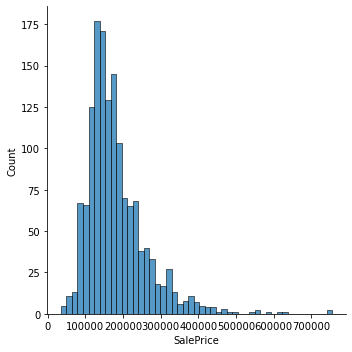

In [5]:
sns.displot(x='SalePrice',data=df_train)# ваш код тут

3.2. Выведите асимметрию и эксцесс (на английском - skewness and kurtosis) для `SalePrice` (не визуально, ответ в числовом формате).

In [6]:
from scipy.stats import kurtosis, skew
x=df_train['SalePrice']
print( 'kurtosis : {}'.format( kurtosis(x) ))
print( 'skewness : {}'.format( skew(x) ))

kurtosis : 6.509812011089439
skewness : 1.880940746034036


Видим, что переменная смещена. То, насколько она похожа на нормальное распределение мы научимся вычислять чуть позже в курсе.

4.Постройте матрицу корреляции, которая будет содержать целевую переменную `SalePrice` и все **числовые**. Отобразите её в виде тепловой карты.  
Числовые переменные необходимо выбрать используя функцию pandas, передавать открыто списком будет считаться неправильным выполнением.   
Если по вашему мнению некоторые переменные необходимо преобразовать в числовые перед построением нужной в этом задании визуализации - преобразуйте, но если не преобразуете, это не будет ошибкой.   
Суть - выделить функцией только числовые переменные и отобразить матрицу корреляции визуально. Не обязательно подписывать при этом значения в клетках матрицы корреляции. Нам важно понять, с чем потенциально хорошо коррелриует таргет, а с чем - нет.

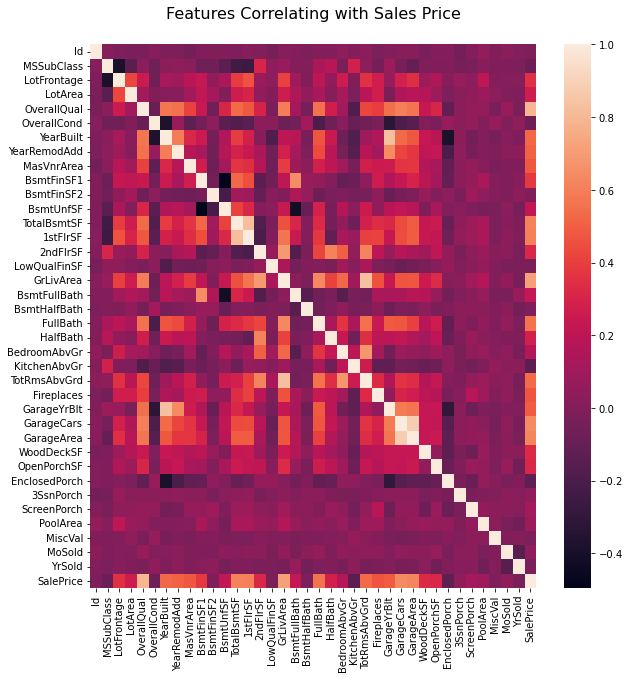

In [7]:
plt.figure(figsize = (10,10))
df_numeric= df_train.select_dtypes(exclude = ['object'])
heatmap = sns.heatmap(df_numeric.corr())
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':16}, pad=26);# ваш код тут

Какие выводы можно сделать из построенной матрицы корреляций? Какие числовые признаки потенциально сильно влияют на целевую переменную, какие - нет?

4.1. Найдите top 10 переменных (не включая саму SalePrice), с которыми `SalePrice` имеет наибольшую положительну корреляцию. Выведите эти переменные и корреляцию с ними.

In [8]:
corr_matrix = df_numeric.corr()
print(corr_matrix.loc["SalePrice"].sort_values(ascending=False)[1:11])

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


4.2. Постройте тепловую карту корреляций только среди переменных `SalePrice` и топ 10, коррелирующих с ней. На тепловой карте выведите числом с двумя цифрами после запятой меру корреляции между каждой парой переменных.

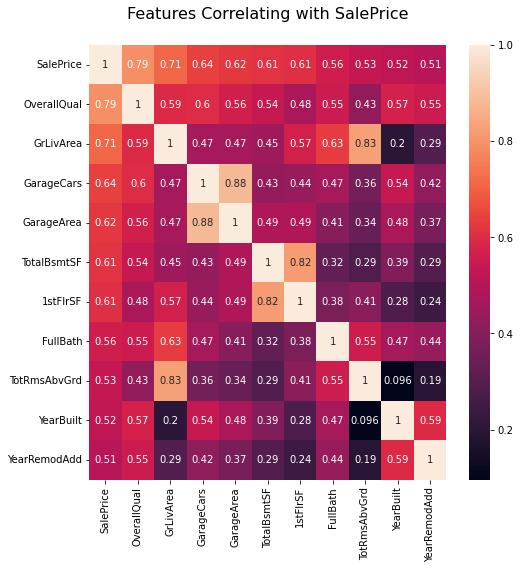

In [9]:
plt.figure(figsize = (8,8))
corr_matrix = df_train[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd',
         'YearBuilt','YearRemodAdd']].corr()
ax = sns.heatmap(corr_matrix,annot=True,fmt='.2g')
ax.set_title('Features Correlating with SalePrice', fontdict={'fontsize':16}, pad=26);
plt.show()# ваш код тут

4.3. Проанализируйте полученный результат. На ваш взгляд, логично ли, что именно эти признаки наиболее коррелируют с целевой переменной?

In [10]:
### По моему мнению здесь GarageCars and 1stFlrSF не особо должны влиять на стоимость жилья 

5.Постройте треугольный (угловой) pairplot для `SalePrice` и топ 10 признаков в наборе данных, коррелирующих с ней.   
Добавьте линии тренда к данным (параметр `kind`). По диагонали выведите kernel density estimation (kde) переменных.

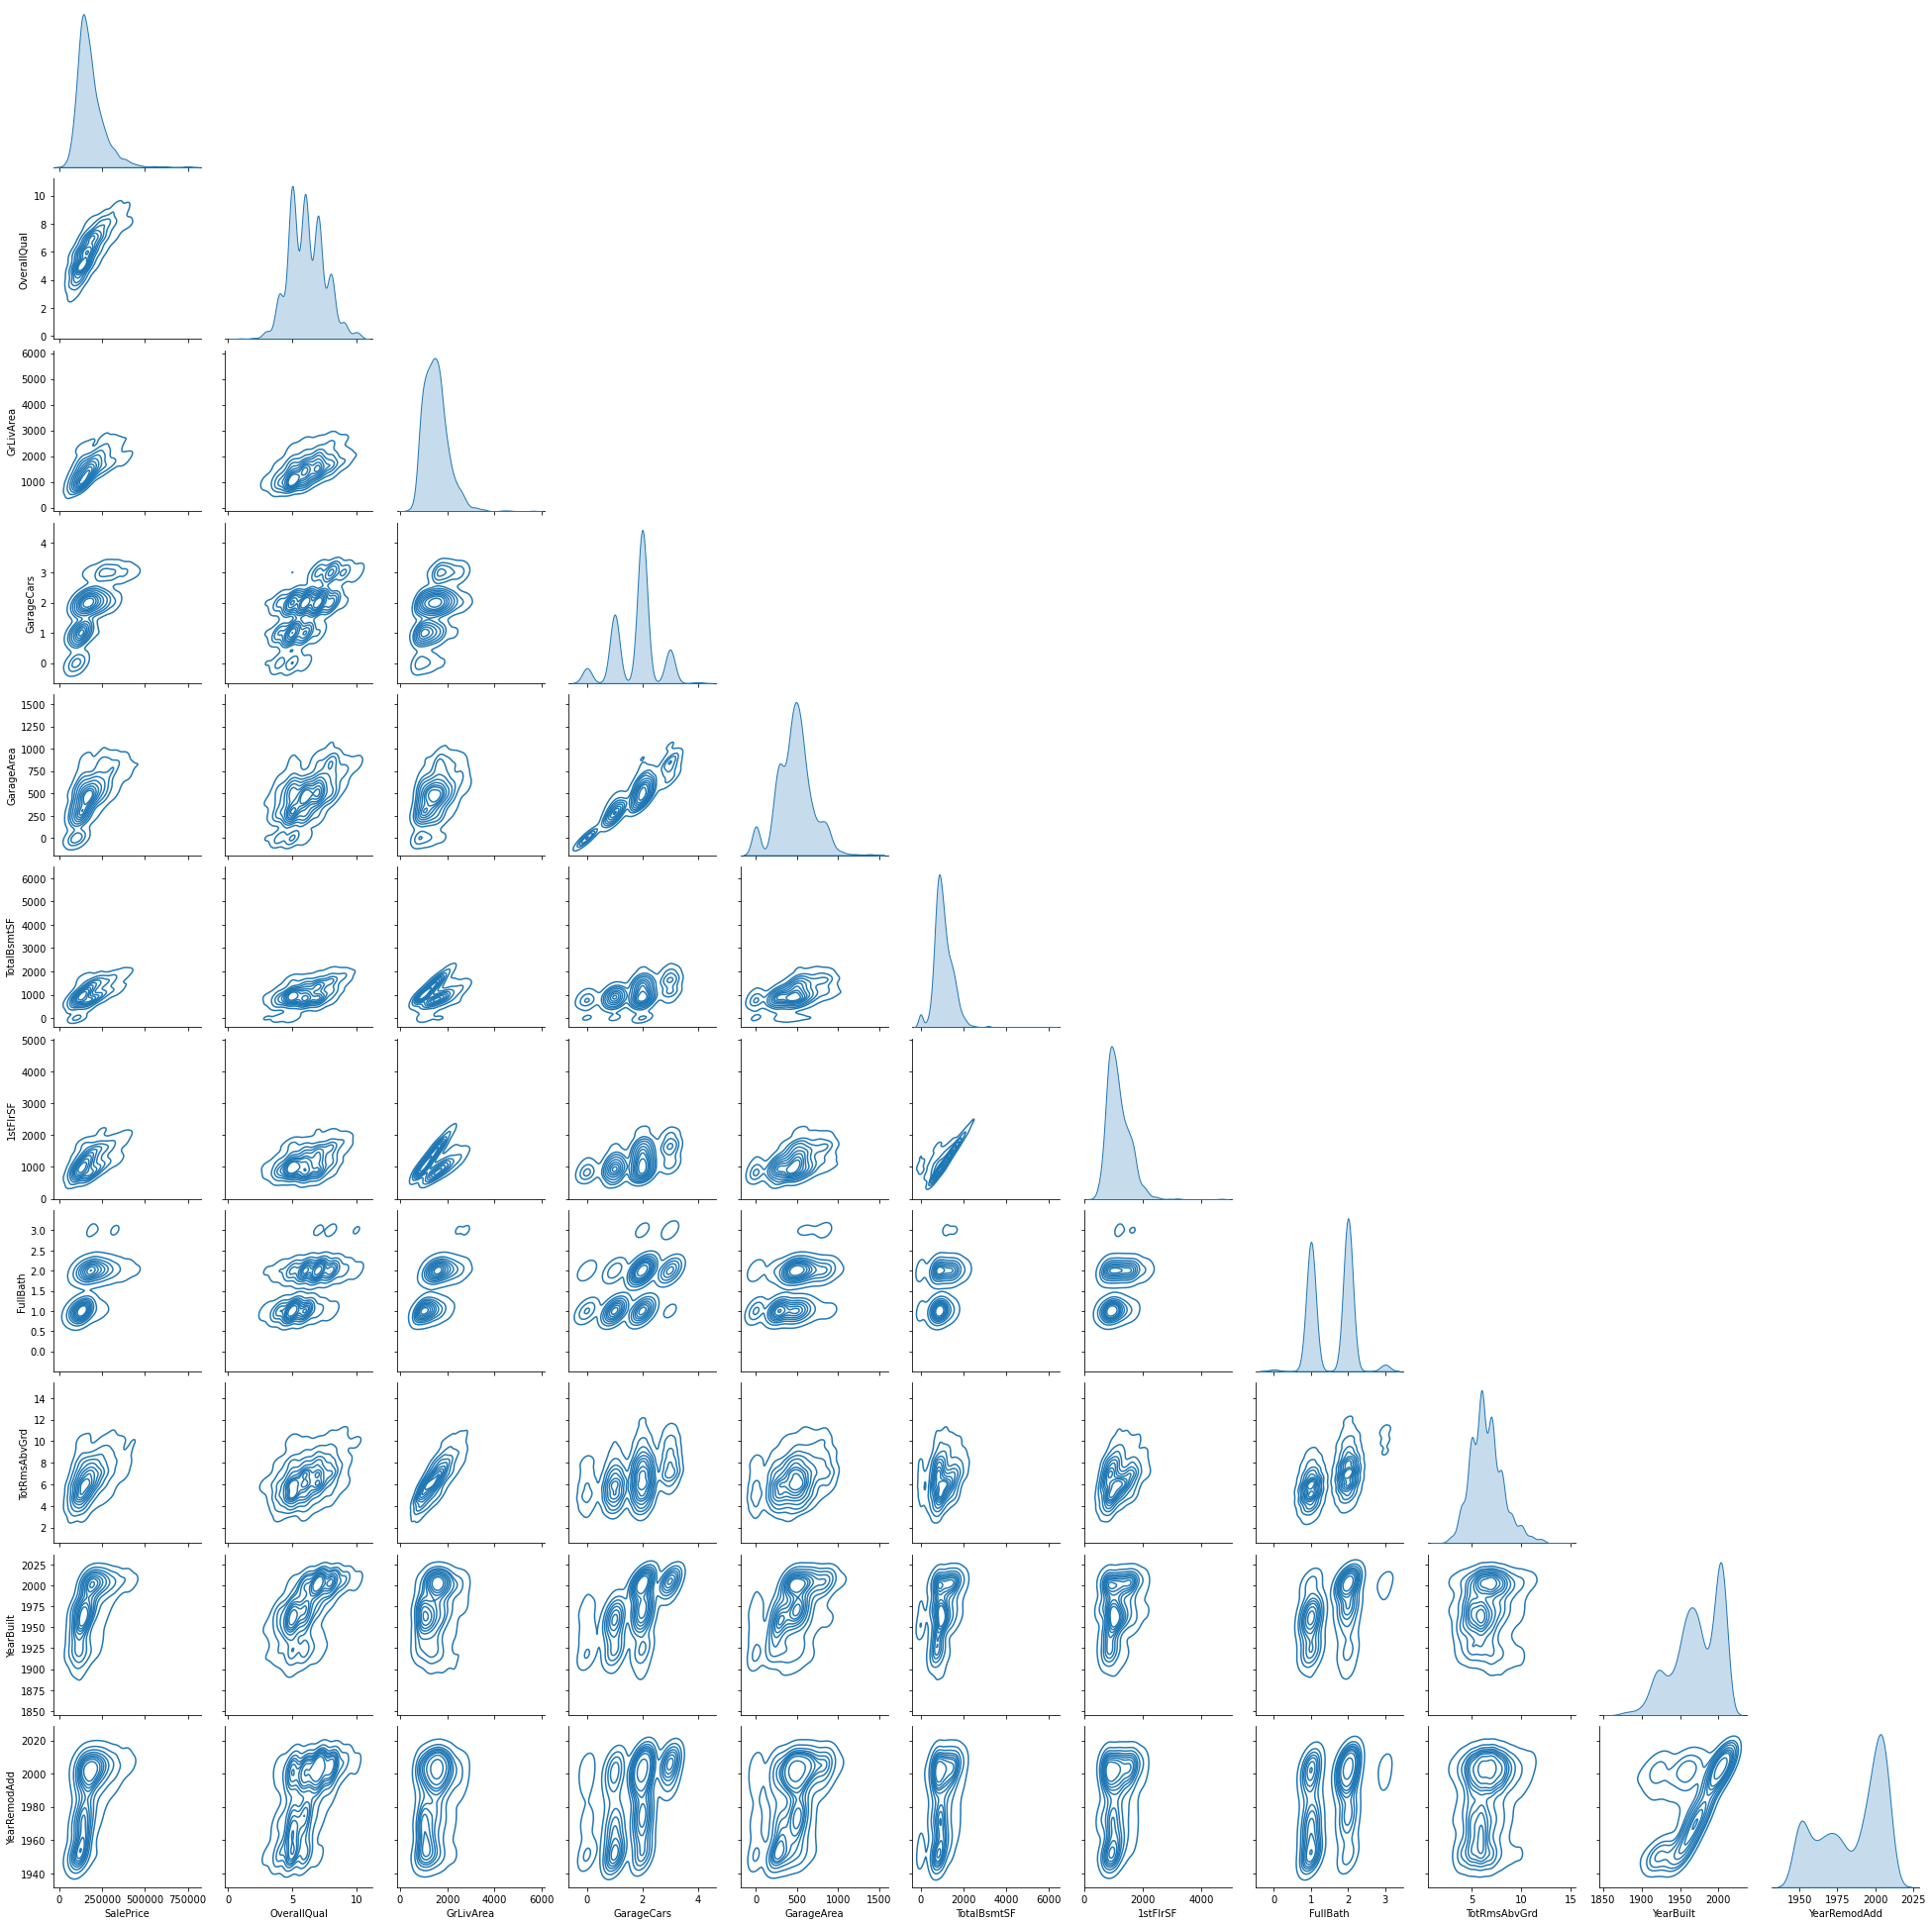

In [11]:
df_top10=df_train[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd',
         'YearBuilt','YearRemodAdd']]
sns.pairplot(df_top10,kind='kde',diag_kind='kde',corner=True)
# ваш код тут

Мы можем видеть точки, которые как будто не попали в общий кластер. Их называют аутлаерами (с англ. outliers) или выбросами. Такими являются, к примеру, точки с невысокой SalePrice и при этом высокое значение GrLivArea, или точка со значением TotalBsmtSF около 6000 и при этом низким SalePrice. Давайте рассмотрим, что это за точки. 

5.1. Выведите точки с GrLivArea строго больше 4000.

In [12]:
LivArea = df_train[df_train['GrLivArea'] > 4000]
LivArea # ваш код тут

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
523          Bnk    AllPub  ...        0    NaN    NaN         NaN       0   
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   
1298         Bnk    AllPub  ...      480     Gd    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
523      10   2007       New        Partial     184750  
691       1   2007        WD         Normal     755000  
1182      7   2007        WD        Abnorml     745000  
1298      1   2008       New        Partial     160000  

[4 rows x 81 columns]

5.2. Кажется, не все колонки поместились при выведении. Установите параметр пандаса `display.max_columns` равный 100. И выведите запрашиваемые в 5.1 данные ещё раз.

In [13]:
pd.set_option('display.max_columns', 100) # ваш код тут
LivArea = df_train[df_train['GrLivArea'] > 4000]
LivArea

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
691        Norm     1Fam     2Story           10            6       1994   
1182       Norm     1Fam     2Story           10            5       1996   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
523        762.0        Ex        TA      PConc       Ex       TA   
691       1170.0        Ex        TA      PConc       Ex       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
523            Gd          GLQ        2260          Unf           0   
691            Gd          GLQ        1455          Unf           0   
1182           Av          GLQ        2096          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
523         878         3138    GasA        Ex          Y      SBrkr   
691         989         2444    GasA        Ex          Y      SBrkr   
1182        300         2396    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
523       3138      1538             0       4676             1             0   
691       2444      1872             0       4316             0             1   
1182      2411      2065             0       4476             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
523          3         1             3             1          Ex   
691          3         1             4             1          Ex   
1182         3         1             4             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
523             11        Typ           1          Gd    BuiltIn       2007.0   
691             10        Typ           2          Ex     Attchd       1994.0   
1182            10        Typ           2          TA     Attchd       1996.0   
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
523           Fin           3         884         TA         TA          Y   
691           Fin           3         832         TA         TA          Y   
1182          Fin           3

5.3. Чем отличаются точки из выбранных те, у которых низкая цена (менее 200000) от тех, у которых цена высокая (более 700000)?
Чтобы легче было дать ответ на этот вопрос, отбросьте колонки, в которых записи для выбранных строк одинаковые во всех строках (везде одно и то же число/строка/дата). Сколько колонок получилось в результате отбрасывания мало информативных? Выведите оставшиеся колокни и дайте ответ на заданный в начале этого пункта вопрос.

В ответе дайте свои гипотезы (минимум 3) насчёт отличий с точки зрения признаков (какие признаки более всего влияют на разницу в цене?). Гипотезы отсортируйте по мере спадания гипотетического влияния (то есть , на первом месте самая на Ваш взгляд рабочая гипотеза, на последнем - самая менее рабочая). Цель ранжирования: представьте, что Вам надо определить топ гипотез и выяснить разница в цене случайная, или проблема в данных. У вас на это ограниченное время, что бы вы проверяли в первую очередь?

In [14]:
dfLivArea=LivArea.query('(SalePrice<200000 ) or (SalePrice>700000)')
dfLivArea.sort_values(by=['SalePrice'],ascending=True)

nunique=dfLivArea.nunique()
cols_to_drop=nunique[nunique<=1].index
delete_col=dfLivArea.drop(cols_to_drop,axis=1)
delete_col.sort_values(by=['SalePrice'],ascending=False)
#Neighborhood - Высокая стоимость домов в соседтсве с Northridge
#SaleCondition - Низкая стоимость домов для незаконченных домов в момент оценки
#SaleType - Высокая стоимость домов с гарантийным договорм (WD)

Id  LotFrontage  LotArea LotShape LandContour LotConfig Neighborhood  \
691    692        104.0    21535      IR1         Lvl    Corner      NoRidge   
1182  1183        160.0    15623      IR1         Lvl    Corner      NoRidge   
523    524        130.0    40094      IR1         Bnk    Inside      Edwards   
1298  1299        313.0    63887      IR3         Bnk    Corner      Edwards   

     Condition1 Condition2  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
691        Norm       Norm            6       1994          1995     Gable   
1182       Norm       Norm            5       1996          1996       Hip   
523        PosN       PosN            5       2007          2008       Hip   
1298      Feedr       Norm            5       2008          2008       Hip   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
691   WdShngl     HdBoard     HdBoard    BrkFace      1170.0        Ex   
1182  CompShg     Wd Sdng     ImStucc       None         0.0        Gd   
523   CompShg     CemntBd     CmentBd      Stone       762.0        Ex   
1298  ClyTile      Stucco      Stucco      Stone       796.0        Ex   

     BsmtExposure  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
691            Gd        1455        989         2444      2444      1872   
1182           Av        2096        300         2396      2411      2065   
523            Gd        2260        878         3138      3138      1538   
1298           Gd        5644        466         6110      4692       950   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  BedroomAbvGr  \
691        4316             0             1         3             4   
1182       4476             1             0         3             4   
523        4676             1             0         3             3   
1298       5642             2             0         2             3   

      TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
691             10           2          Ex     Attchd       1994.0   
1182            10           2          TA     Attchd       1996.0   
523             11           1          Gd    BuiltIn       2007.0   
1298            12           3          Gd     Attchd       2008.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  PoolArea PoolQC  \
691            3         832         382           50         0    NaN   
1182           3         813         171           78       555     Ex   
523            3         884         208          406         0    NaN   
1298           2        1418         214          292       480     Gd   

      MoSold  YrSold SaleType SaleCondition  SalePrice  
691        1    2007       WD        Normal     755000  
1182       7    2007       WD       Abnorml     745000  
523       10    2007      New       Partial     184750  
1298       1    2008      New       Partial     160000

5.4. Постройте диаграмму рассеянья с помощью Plotly express, в которой по оси ОХ GrLivArea, по оси ОУ SalePrice, цвет - Condition1 и при наведении на точку чтоб выводилась дополнительная информация об id объекта (параметр `hover_data`).

In [15]:
px.scatter(df_train,x='GrLivArea',y='SalePrice',color='Condition1',hover_data=['Id'])
# ваш код тут

Для дома с Id=1299 мы могли бы обосновать низкую цену тем, что он имеет параметр Condition1=FeedR (точки с этим параметром обычно имеют ниже цену), а вот с Id=524 Condition1 = PosN вряд ли влияет негативно на цену, скорее наоборот. Похоже причина низкой цены этих домов - другая. 

5.5. Постройте диаграмму рассеянья с помощью Plotly express, в которой по оси ОХ GrLivArea, по оси ОУ SalePrice, цвет - Neighborhood и при наведении на точку чтоб выводилась дополнительная информация об id объекта.

In [16]:
px.scatter(df_train,x='GrLivArea',y='SalePrice',color='Neighborhood',hover_data=['Id'])# ваш код тут

Посмотрите на SalePrice по разным Neighborhood, видите ли вы закономерности?  
Выведите mean, std, min, max, mode значения SalePrice для разных значений Neighborhood (оптимально - с использованием функций groupby() и describe()), отсортируйте значения по убыванию mean, сделайте градиентное закрашивание таблицы. Подтверждаются ли найденные закономерности с диаграммы?

In [17]:
df_train['SalePrice'].groupby(df_train['Neighborhood']).agg(['mean','std','min','max']).sort_values(by='mean',ascending=False).style.background_gradient()# ваш код тут

Похоже дома  Id=524 и  Id=1299 имеют соседство, в котором стоимости домов низкие. Этим возможно и обосновывается цена. Но это только гипотеза.

6.1. C помощью библиотеки missingno выведите в виде bar chart количество отсутствующих значений в колонках датасета. Чтобы просматривать было комфортно, выведите на одной фигуре две панели расположенные вертикально (т.е. вторая под первой), где на первой панели будет инфорпмация про отсутствующие значения в первых 40 колонках, а на второй - во всех остальных.

<Figure size 50400x36000 with 0 Axes>

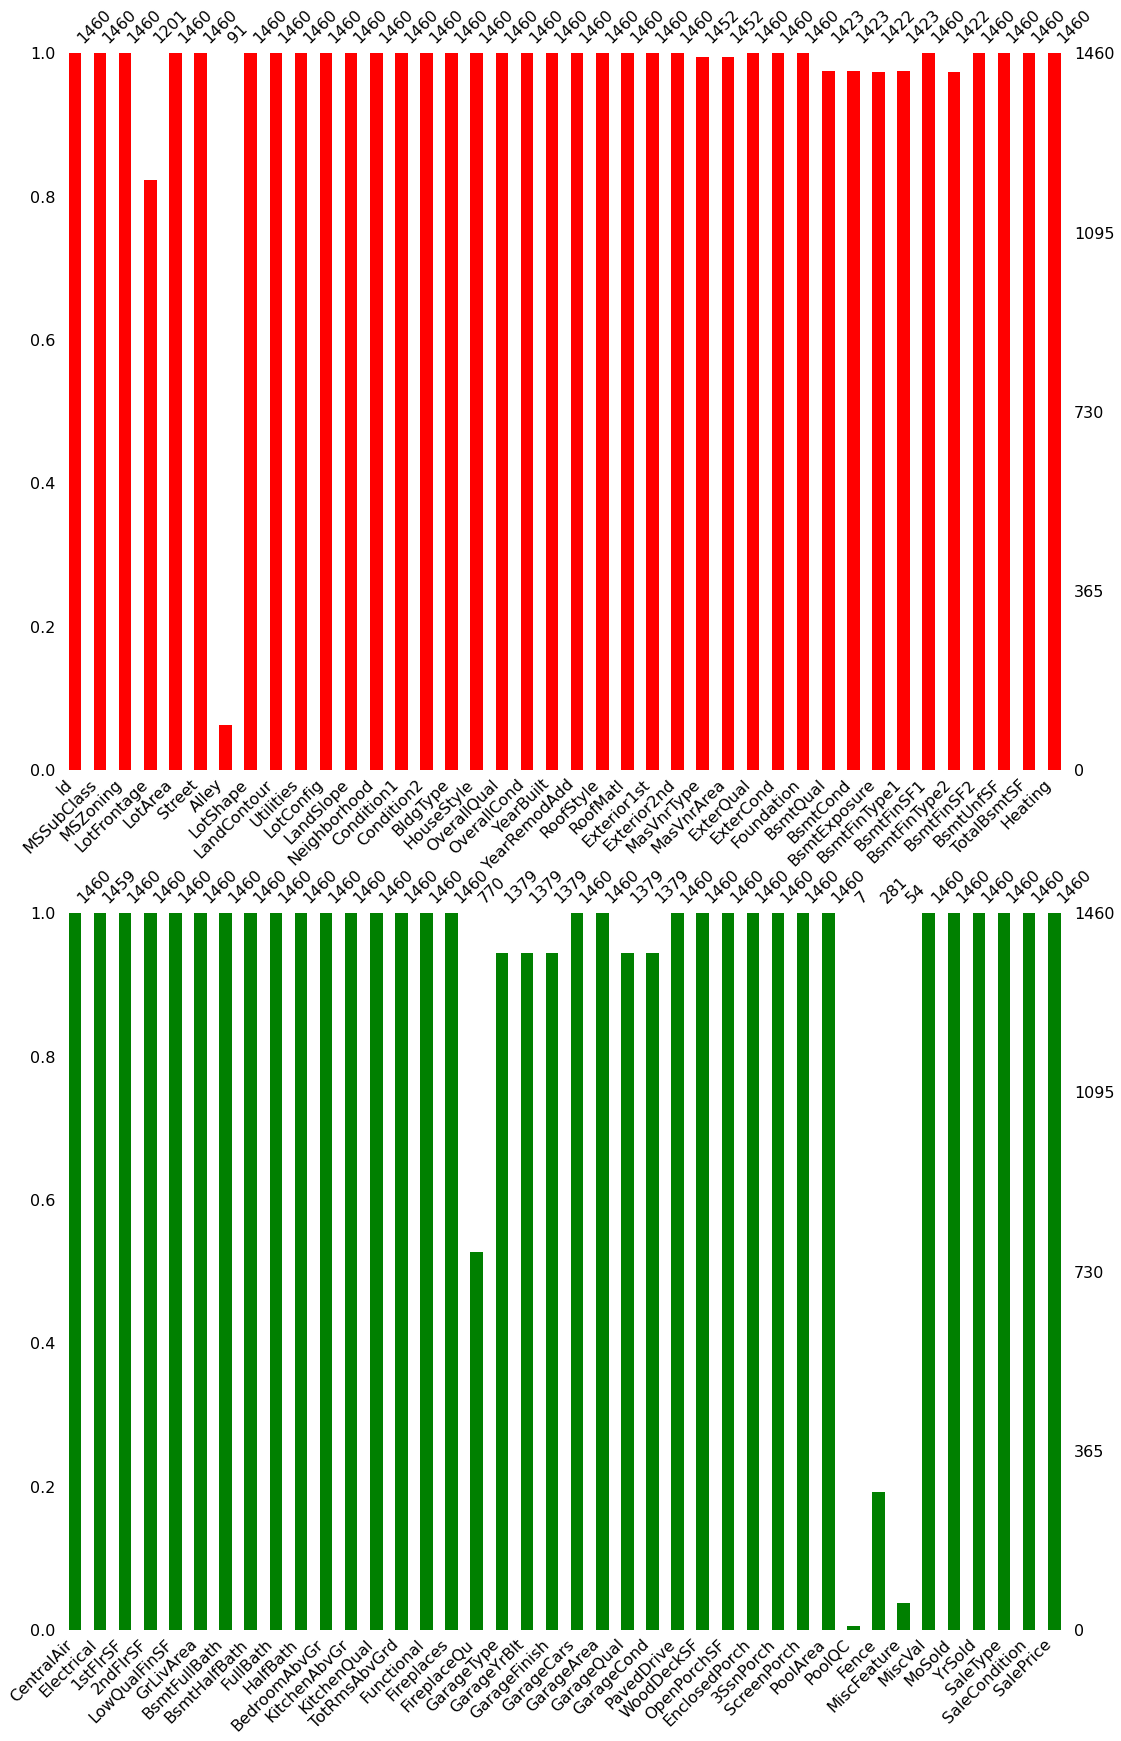

In [18]:
fig = plt.figure(figsize=(700,500))
data_top40 = df_train.iloc[:,0:40]
df3=df_train.iloc[:,41:]

fig, axes = plt.subplots(nrows = 2, ncols = 1)
msno.bar(data_top40,color='red',ax=axes[0])

msno.bar(df3,color='green',ax=axes[1])
fig.set_figwidth(18)
fig.set_figheight(29)


Пользуясь визуализацией, определите, в каких колонках отсутствует более половины записей. Ответ - текстом названия колонок.

In [19]:
# Alley, PoolQC, Fence, MiscFeature # ваш ответ тут

6.2.1. Проведём подобный анализ не визуально, а аналитически, чтобы вы имели возможность выбрать то, что вам удобнее. 
Посчитайте, сколько значений отсутствуют в каждой из колонок датафрейма df_train (используйте функцию isna() и гугл при необходимости).  
Запишите результат в переменную count_na.


In [20]:
count_na = df_train.isna().sum().sort_values(ascending=False) # ваш код тут
count_na[count_na>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

6.2.2. Пользуясь переменной count_na выведите колонки, у которых процент отсутствующих значений строго более 50. 
Ответом должна быть структура pd.Series с индексом - название колонки и значениями - процент отсуствующих значений в этой колонке.

In [21]:
ser=pd.Series(round((df.isnull().sum() * 100/ len(df)),2),index=df_train.columns)
ser[ser>50]# ваш код тут

Alley          93.77
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

Сравните полученные результаты с теми, что вы указали в п. 6.1, они должны совпадать.

6.3. Выведите матричное отображение отсутствующих значений с помощью библиотеки missingno. Найдите, какое максимальное количество заполненных данных в одной строке и какое - минимальное. Количество заполненных данных в одной строке ограничено сверху количеством колонок.  

Внимание: чтобы ответить на заданные вопрос корректно пользуясь визуализацией, вам необходимо вывести тут на **одной** диаграмме **все** колонки сразу (они поместятся).

<AxesSubplot:>

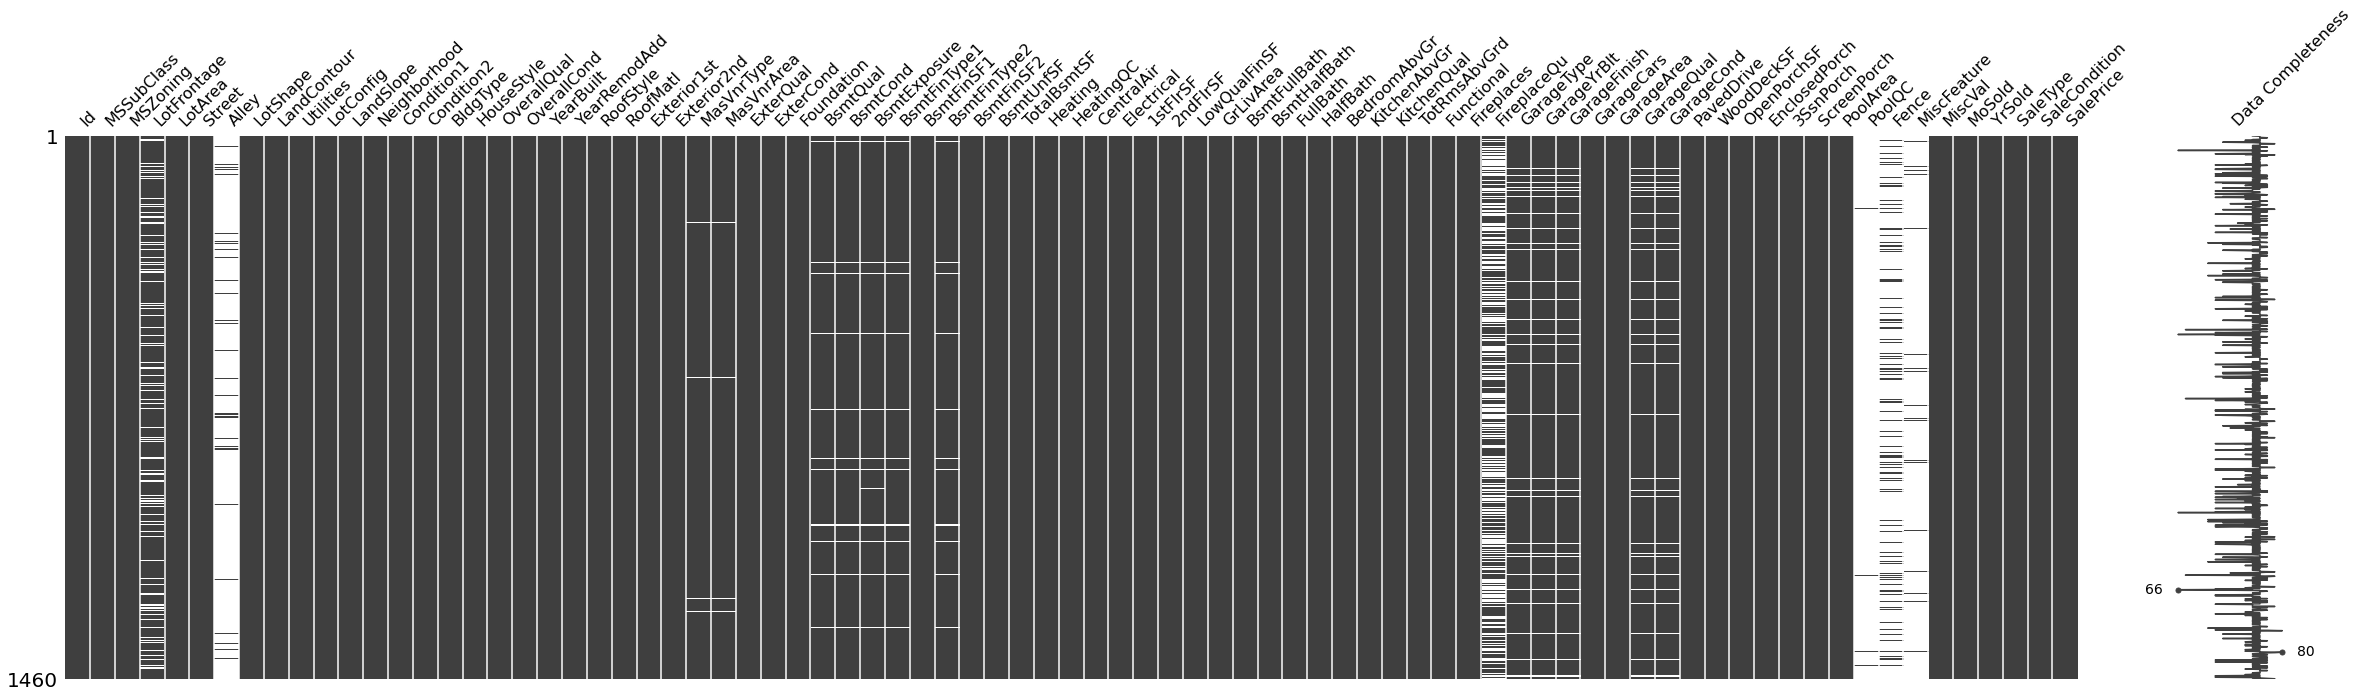

In [22]:
msno.matrix(df_train,labels=True,figsize=(40,10))# ваш код тут

In [23]:
##максимальное количество заполненных данных в одной строке 1460
##минимальное количество заполненных данных в одной строке 1      # ваш ответ тут

6.4. Выведите тепловую карту отвутствующих значений с помощью библиотеки missingno.  
Если отсутствуют значения в переменной GarageType, у каких ещё переменных тоже будут отсутствовать значения?

<AxesSubplot:>

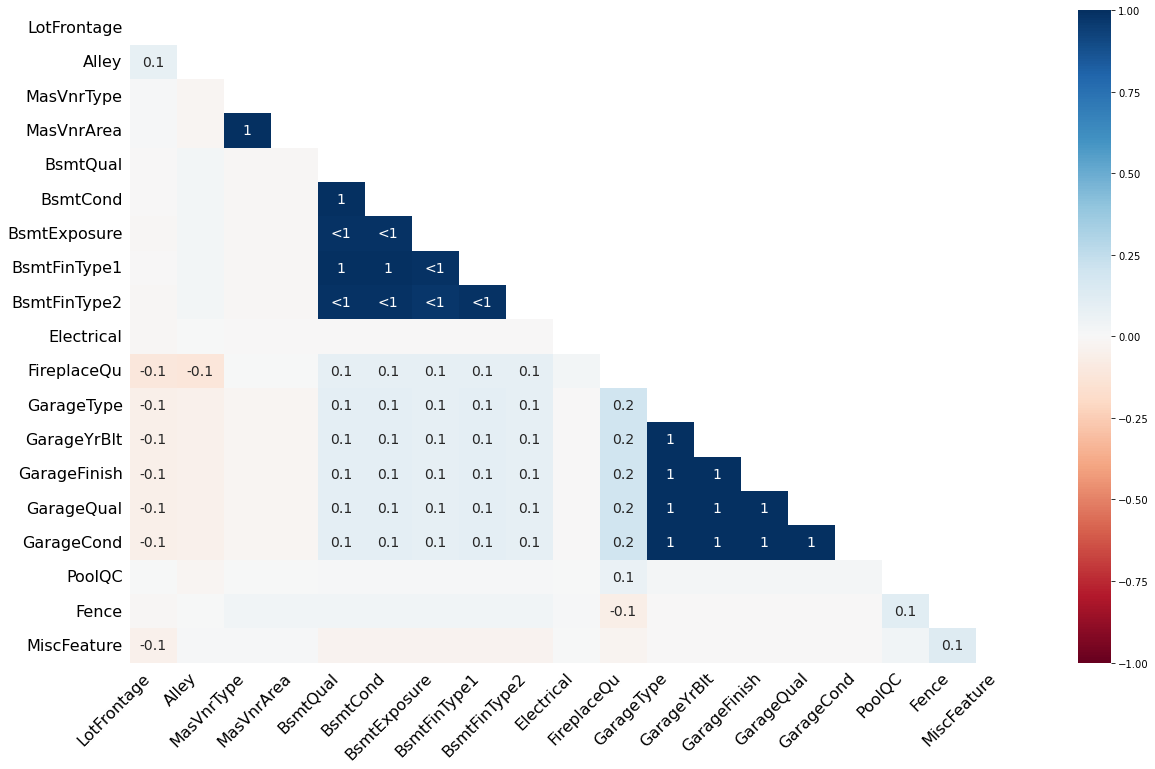

In [24]:
msno.heatmap(df_train) # ваш код тут

In [25]:
# GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond # ваш ответ тут